# ***Importing Liberries***

**NOTE!!**

1- some cells gave **errors** i left it on purpose to see the way i was thinking in and the reasons to do some of the non obvious steps so you when running the file pleas just skape those cells.

2- if the fitting model gaves error just drom the NaN values agian and it will work.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from math import e
from scipy.stats import gmean
from scipy.stats import hmean
import plotly.express as pltly
plt.style.use('ggplot')

# ***Importing the data sets***

In [3]:
energy_usage=pd.read_csv('C:/Users/Mohamed/Desktop/world_data/API.csv', skiprows=4)
gdp=pd.read_csv('C:/Users/Mohamed/Desktop/world_data/API_NY.csv', skiprows=4)
cal=pd.read_csv('C:/Users/Mohamed/Desktop/world_data/daily-per-capita-caloric-supply.csv')

In [4]:
energy_usage.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                 Indicator Name     Indicator Code  1960  \
0  Energy use (kg of oil equivalent per capita)  EG.USE.PCAP.KG.OE   NaN   
1  Energy use (kg of oil equivalent per capita)  EG.USE.PCAP.KG.OE   NaN   
2  Energy use (kg of oil equivalent per capita)  EG.USE.PCAP.KG.OE   NaN   
3  Energy use (kg of oil equivalent per capita)  EG.USE.PCAP.KG.OE   NaN   
4  Energy use (kg of oil equivalent per capita)  EG.USE.PCAP.KG.OE   NaN   

   1961  1962  1963  1964  1965  ...        2016        2017        2018  \
0   NaN   NaN   NaN   NaN   NaN  ...         NaN         NaN         NaN   
1   NaN   NaN   NaN   NaN   NaN  ...  607.297809  597.786385  585.044145   
2   NaN   NaN   NaN   NaN   NaN  ...         NaN         NaN         NaN   
3   NaN   NaN   NaN   NaN   NaN  ...  343.896338  332.429748  325.467766   
4   NaN   NaN   NaN   NaN   NaN  ...  462.934994  456.692217  405.179753   

         2019        2020        2021        2022  2023  2024  Unnamed: 69  
0         NaN         NaN         NaN         NaN   NaN   NaN          NaN  
1  587.648036  566.960723  579.816693  562.060699   NaN   NaN          NaN  
2         NaN         NaN         NaN         NaN   NaN   NaN          NaN  
3  341.666133  336.566407  350.102510  351.913062   NaN   NaN          NaN  
4  416.996507  397.633187  418.358996  423.122518   NaN   NaN          NaN  

[5 rows x 70 columns]

In [5]:
gdp.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                       Indicator Name  Indicator Code         1960  \
0  GDP per capita (constant 2015 US$)  NY.GDP.PCAP.KD          NaN   
1  GDP per capita (constant 2015 US$)  NY.GDP.PCAP.KD  1186.349620   
2  GDP per capita (constant 2015 US$)  NY.GDP.PCAP.KD          NaN   
3  GDP per capita (constant 2015 US$)  NY.GDP.PCAP.KD  1130.411973   
4  GDP per capita (constant 2015 US$)  NY.GDP.PCAP.KD          NaN   

          1961         1962         1963         1964         1965  ...  \
0          NaN          NaN          NaN          NaN          NaN  ...   
1  1160.458789  1219.356473  1253.445317  1275.886801  1304.275651  ...   
2          NaN          NaN          NaN          NaN          NaN  ...   
3  1127.572551  1144.920732  1199.197534  1236.216308  1258.758091  ...   
4          NaN          NaN          NaN          NaN          NaN  ...   

           2016          2017          2018          2019          2020  \
0  27587.249804  28548.890432  29419.208623  29699.180537  22729.889759   
1   1490.907546   1490.911098   1489.942137   1479.372387   1399.398498   
2    563.872337    562.769574    553.125152    557.861533    527.834554   
3   1815.171203   1808.722201   1814.694636   1829.068064   1719.261504   
4   3454.033172   3328.898212   3196.790070   3083.975344   2864.161460   

           2021          2022          2023          2024  Unnamed: 69  
0  26292.917936  29195.267023  31430.935368  33373.917459          NaN  
1   1425.209057   1440.430366   1431.721790   1435.356278          NaN  
2    408.625855    377.665627    378.066303           NaN          NaN  
3   1721.909475   1757.456590   1778.864347   1816.346044          NaN  
4   2832.817771   2860.902519   2809.157280   2845.477793          NaN  

[5 rows x 70 columns]

In [6]:
cal.head()

Entity Code  Year  Daily calorie supply per person
0  Afghanistan  AFG  1961                        2914.3484
1  Afghanistan  AFG  1962                        2835.6074
2  Afghanistan  AFG  1963                        2623.7017
3  Afghanistan  AFG  1964                        2872.5679
4  Afghanistan  AFG  1965                        2876.1790

In [7]:
cal.rename(columns={"Entity":"Country Name","Code":"Country Code"},inplace=True)

In [8]:
cal.head()

Country Name Country Code  Year  Daily calorie supply per person
0  Afghanistan          AFG  1961                        2914.3484
1  Afghanistan          AFG  1962                        2835.6074
2  Afghanistan          AFG  1963                        2623.7017
3  Afghanistan          AFG  1964                        2872.5679
4  Afghanistan          AFG  1965                        2876.1790

# ***Data Cleaning and Preparation***

1. Dropping unnecessary columns

In [9]:
eng=energy_usage.drop(columns=['Indicator Code', 'Indicator Name','Unnamed: 69'])
gdp.drop(columns=['Indicator Code', 'Indicator Name','Unnamed: 69'],inplace=True)

Because I got the calories usage from another source, and I will merge all the data sets together, there might be a difference in the way the same country was named, but the country code is more reliable, but also I will check that. 

In [10]:
print(sorted(eng['Country Name'].unique()) == sorted(cal['Country Name'].unique()))

False


There are some differences in naming some countries across the two data sets.

In [11]:
print(sorted(eng['Country Code'].unique()) == sorted(cal['Country Code'].unique()))

TypeError: '<' not supported between instances of 'float' and 'str'

In [12]:
eng_codes = eng['Country Code'].dropna().unique()
cal_codes = cal['Country Code'].dropna().unique()
print(sorted(eng_codes) == sorted(cal_codes))

False


In [13]:
eng_codes

array(['ABW', 'AFE', 'AFG', 'AFW', 'AGO', 'ALB', 'AND', 'ARB', 'ARE',
       'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
       'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ',
       'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN',
       'CEB', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG',
       'COL', 'COM', 'CPV', 'CRI', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP',
       'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR',
       'EAS', 'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST',
       'ETH', 'EUU', 'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB',
       'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC',
       'HRV', 'HTI', 'HUN', 'IBD', 'IBT', 'IDA', 'IDB', 'IDN', 'IDX',
       'IMN', 'IND', 'INX', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA',
       'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA',
       'KOR', 'KWT',

In [14]:
cal_codes

array(['AFG', 'ALB', 'DZA', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT',
       'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN',
       'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA',
       'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN',
       'COL', 'COM', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE',
       'OWID_CZS', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'TLS', 'ECU', 'EGY',
       'SLV', 'EST', 'SWZ', 'ETH', 'OWID_ERE', 'FJI', 'FIN', 'FRA', 'PYF',
       'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN',
       'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ',
       'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR',
       'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI',
       'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MNG', 'MNE',
       'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'ANT', 'NCL',
       'NZ

In [15]:
l=set(eng_codes).symmetric_difference(set(cal_codes))

In [16]:
L=list(l)
L

['HIC',
 'MCO',
 'TEA',
 'TSA',
 'TCA',
 'LMC',
 'SGP',
 'ASM',
 'IDB',
 'TMN',
 'VIR',
 'CHI',
 'MIC',
 'ECS',
 'TWN',
 'TSS',
 'EAR',
 'AFW',
 'OWID_YGS',
 'FRO',
 'MEA',
 'CUW',
 'PSS',
 'GNQ',
 'OSS',
 'AFE',
 'EUU',
 'LAC',
 'SAS',
 'ABW',
 'CSS',
 'MAF',
 'UMC',
 'ANT',
 'MNA',
 'OWID_WRL',
 'GIB',
 'EAP',
 'GRL',
 'XKX',
 'OWID_CZS',
 'SSA',
 'VGB',
 'OWID_USS',
 'NAC',
 'SSF',
 'LMY',
 'HPC',
 'MNP',
 'OED',
 'LIC',
 'OWID_SRM',
 'IBD',
 'LCN',
 'AND',
 'ARB',
 'FCS',
 'PRI',
 'IBT',
 'INX',
 'EAS',
 'GUM',
 'PRE',
 'CYM',
 'EMU',
 'TEC',
 'PST',
 'TLA',
 'PSE',
 'LIE',
 'SXM',
 'ERI',
 'PLW',
 'LTE',
 'OWID_ERE',
 'CEB',
 'IDA',
 'WLD',
 'LDC',
 'SMR',
 'ECA',
 'SST',
 'IDX',
 'IMN']

In [17]:
for i in L:
    cont_lin=eng[eng['Country Code']==i]
    cont_nm=cont_lin['Country Name']
    print(i+' Satnds for: '+cont_nm)

95    HIC Satnds for: High income
Name: Country Name, dtype: object
149    MCO Satnds for: Monaco
Name: Country Name, dtype: object
230    TEA Satnds for: East Asia & Pacific (IDA & IBR...
Name: Country Name, dtype: object
240    TSA Satnds for: South Asia (IDA & IBRD)
Name: Country Name, dtype: object
228    TCA Satnds for: Turks and Caicos Islands
Name: Country Name, dtype: object
139    LMC Satnds for: Lower middle income
Name: Country Name, dtype: object
208    SGP Satnds for: Singapore
Name: Country Name, dtype: object
11    ASM Satnds for: American Samoa
Name: Country Name, dtype: object
105    IDB Satnds for: IDA blend
Name: Country Name, dtype: object
238    TMN Satnds for: Middle East, North Africa, Afg...
Name: Country Name, dtype: object
256    VIR Satnds for: Virgin Islands (U.S.)
Name: Country Name, dtype: object
38    CHI Satnds for: Channel Islands
Name: Country Name, dtype: object
156    MIC Satnds for: Middle income
Name: Country Name, dtype: object
65    ECS Satnds fo

As we see, the majority of the excess data is in fact either economical blends or regions. That means that keeping them in the data will affect our calculations because they might be calculated twice, so anyways, removing them from the data is the solution.
I will drop it latter.


NOTE: The only country that I observed was Kosovo, and it in fact has no data, just NaN values.

**=> Transforming the shape of the data.**

In [18]:
eng_use=pd.melt(eng,
            id_vars=['Country Name', 'Country Code'],
            var_name='Year',
            value_name='KGOPC')

In [19]:
gdp_pc=pd.melt(gdp,
            id_vars=['Country Name', 'Country Code'],
            var_name='Year',
            value_name='GDPPC')

In [20]:
eng_use.sort_values(by='KGOPC',ascending=False).dropna()

Country Name Country Code  Year         KGOPC
11904        Qatar          QAT  2004  21557.475076
14032        Qatar          QAT  2012  21456.066928
14298        Qatar          QAT  2013  20642.142323
12170        Qatar          QAT  2005  20198.168905
12436        Qatar          QAT  2006  20140.342875
...            ...          ...   ...           ...
12111      Lesotho          LSO  2005     16.896424
11845      Lesotho          LSO  2004     14.205057
12377      Lesotho          LSO  2006      9.768321
12643      Lesotho          LSO  2007      9.727288
8151       Namibia          NAM  1990      0.000000

[6569 rows x 4 columns]

In [21]:
gdp_pc.sort_values(by='GDPPC', ascending=False).dropna()

Country Name Country Code  Year          GDPPC
17173       Monaco          MCO  2024  247170.219911
16907       Monaco          MCO  2023  225884.183304
16641       Monaco          MCO  2022  214359.605826
16375       Monaco          MCO  2021  194674.777609
15843       Monaco          MCO  2019  185582.755690
...            ...          ...   ...            ...
1224       Myanmar          MMR  1964     132.522440
692        Myanmar          MMR  1962     129.887941
160        Myanmar          MMR  1960     129.772040
426        Myanmar          MMR  1961     127.564281
2022       Myanmar          MMR  1967     122.678901

[14306 rows x 4 columns]

**Merging Data**

In [22]:
data=pd.merge(eng_use, cal, on=['Country Name', 'Year']).merge(gdp_pc,on=['Country Name', 'Year'])

ValueError: You are trying to merge on object and int64 columns for key 'Year'. If you wish to proceed you should use pd.concat

In [23]:
eng_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  17290 non-null  object 
 1   Country Code  17290 non-null  object 
 2   Year          17290 non-null  object 
 3   KGOPC         6569 non-null   float64
dtypes: float64(1), object(3)
memory usage: 540.4+ KB


the data type of the "Year" columns is different in the two sets so i will change the data type of the "Year" column from object to int

In [24]:
eng_use['Year']=eng_use['Year'].astype(int)

In [25]:
gdp_pc['Year']=gdp_pc['Year'].astype(int)

In [26]:
eng_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  17290 non-null  object 
 1   Country Code  17290 non-null  object 
 2   Year          17290 non-null  int32  
 3   KGOPC         6569 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 472.9+ KB


In [27]:
# Trying the same code againe
data=pd.merge(eng_use, cal, on=['Country Code', 'Year']).merge(gdp_pc,on=['Country Code', 'Year'])

In [28]:
data=data.drop(columns=['Country Name_y','Country Name']).rename(columns={'Country Name_x': 'Country Name'})

In [29]:
data=data.rename(columns={'Daily calorie supply per person':"CalPCPD"})

In [30]:
data

Country Name Country Code  Year        KGOPC    CalPCPD         GDPPC
0            Belgium          BEL  1960          NaN  3040.0000  11715.826836
1            Germany          DEU  1960          NaN  2960.0000  12606.944265
2            Finland          FIN  1960          NaN  3110.0000  11153.778617
3             France          FRA  1960          NaN  3050.0000  10776.123361
4     United Kingdom          GBR  1960          NaN  3280.0000  15323.628637
...              ...          ...   ...          ...        ...           ...
9906           Samoa          WSM  2022          NaN  3164.3618   4095.158683
9907     Yemen, Rep.          YEM  2022    68.949535  1836.5474           NaN
9908    South Africa          ZAF  2022  1938.306447  2651.0393   5786.865053
9909          Zambia          ZMB  2022   800.674874  2143.6448   1298.848050
9910        Zimbabwe          ZWE  2022   416.586875  2072.4438   1369.197615

[9911 rows x 6 columns]

# ******The Analysis******

In [31]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

Text(0.5, 1.0, 'Energy Use (KgOPC) (Enerji Kullanımı)\ndağılımı ile ortalama, medyan ve mod\n')

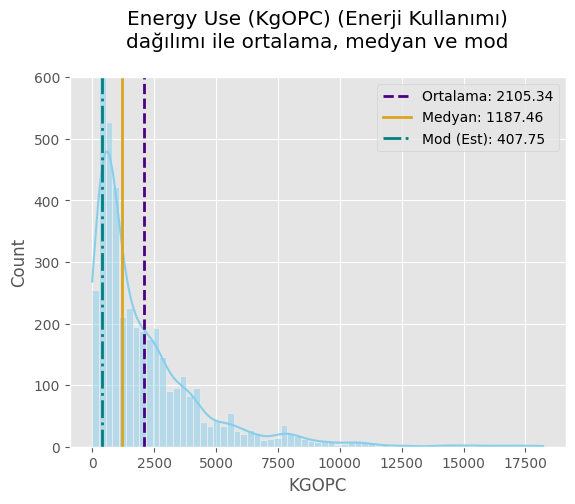

In [32]:
eng_plot = sns.histplot(data['KGOPC'], kde=True,color="skyblue")
mean_val = data['KGOPC'].mean()
median_val = data['KGOPC'].median()
counts, bins = np.histogram(data['KGOPC'], bins='auto')
mode_val = bins[np.argmax(counts)] + (bins[1] - bins[0])/2
plt.axvline(mean_val, color='indigo', linestyle='--', linewidth=2, label=f'Ortalama: {mean_val:.2f}')
plt.axvline(median_val, color='goldenrod', linestyle='-', linewidth=2, label=f'Medyan: {median_val:.2f}')
plt.axvline(mode_val, color='teal', linestyle='-.', linewidth=2, label=f'Mod (Est): {mode_val:.2f}')
plt.ylim(top=600)
plt.legend()
plt.title("Energy Use (KgOPC) (Enerji Kullanımı)\ndağılımı ile ortalama, medyan ve mod\n")

In [33]:
print(f'STD: {data['KGOPC'].std()}')
print(f'variance: {data['KGOPC'].var()}')
print(f'Coefficient of Variation: {data['KGOPC'].var()/data['KGOPC'].mean()}')
print(f'skew: {data['KGOPC'].skew()}')
print(f'kurt: {data['KGOPC'].kurt()}')

STD: 2397.662057815004
variance: 5748783.34348568
Coefficient of Variation: 2730.5685406218704
skew: 2.536314790578613
kurt: 8.87026543661666


Text(0.5, 1.0, 'GDP per Capita (Kişi Başına Düşen GSYİH)\ndağılımı ile ortalama, medyan ve mod\n')

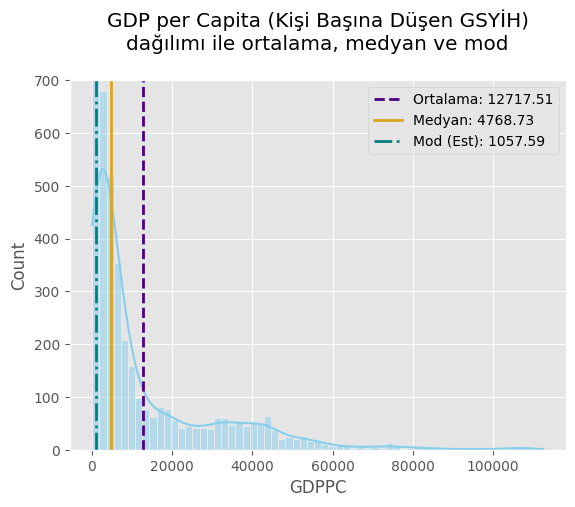

In [34]:
eng_plot = sns.histplot(data['GDPPC'], kde=True,color="skyblue")
mean_val = data['GDPPC'].mean()
median_val = data['GDPPC'].median()
counts, bins = np.histogram(data['GDPPC'], bins='auto')
mode_val = bins[np.argmax(counts)] + (bins[1] - bins[0])/2
plt.axvline(mean_val, color='indigo', linestyle='--', linewidth=2, label=f'Ortalama: {mean_val:.2f}')
plt.axvline(median_val, color='goldenrod', linestyle='-', linewidth=2, label=f'Medyan: {median_val:.2f}')
plt.axvline(mode_val, color='teal', linestyle='-.', linewidth=2, label=f'Mod (Est): {mode_val:.2f}')
plt.ylim(top=700)
plt.legend()
plt.title("GDP per Capita (Kişi Başına Düşen GSYİH)\ndağılımı ile ortalama, medyan ve mod\n")

In [35]:
print(f'STD: {data['GDPPC'].std()}')
print(f'variance: {data['GDPPC'].var()}')
print(f'Coefficient of Variation: {data['GDPPC'].var()/data['GDPPC'].mean()}')
print(f'skew: {data['GDPPC'].skew()}')
print(f'kurt: {data['GDPPC'].kurt()}')

STD: 17495.03075100899
variance: 306076100.9787503
Coefficient of Variation: 24067.305786890407
skew: 2.1756315468277942
kurt: 5.400032018836299


Text(0.5, 1.0, 'Daily Caloric Intake per Capita\n(Kişi başına düşen günlük ortalama kilokalori miktarını)\ndağılımı ile ortalama, medyan ve mod\n')

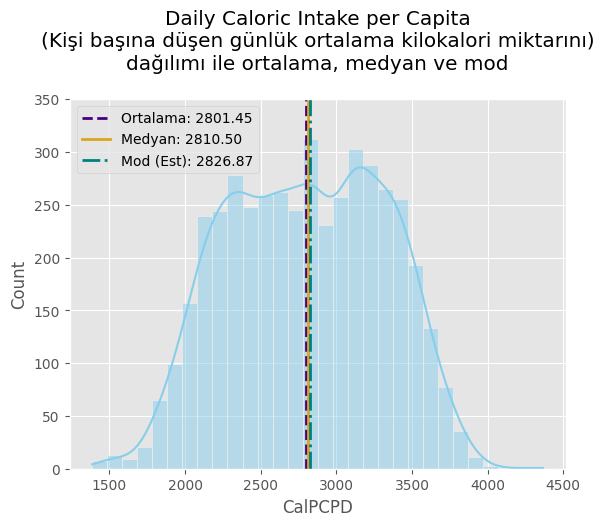

In [36]:
eng_plot = sns.histplot(data['CalPCPD'], kde=True,color="skyblue")
mean_val = data['CalPCPD'].mean()
median_val = data['CalPCPD'].median()
counts, bins = np.histogram(data['CalPCPD'], bins='auto')
mode_val = bins[np.argmax(counts)] + (bins[1] - bins[0])/2
plt.axvline(mean_val, color='indigo', linestyle='--', linewidth=2, label=f'Ortalama: {mean_val:.2f}')
plt.axvline(median_val, color='goldenrod', linestyle='-', linewidth=2, label=f'Medyan: {median_val:.2f}')
plt.axvline(mode_val, color='teal', linestyle='-.', linewidth=2, label=f'Mod (Est): {mode_val:.2f}')
plt.ylim(top=350)
plt.legend()
plt.title("Daily Caloric Intake per Capita\n(Kişi başına düşen günlük ortalama kilokalori miktarını)\ndağılımı ile ortalama, medyan ve mod\n")

In [37]:
print(f'STD: {data['CalPCPD'].std()}')
print(f'variance: {data['CalPCPD'].var()}')
print(f'Coefficient of Variation: {data['CalPCPD'].var()/data['CalPCPD'].mean()}')
print(f'skew: {data['CalPCPD'].skew()}')
print(f'kurt: {data['CalPCPD'].kurt()}')

STD: 514.3074885080986
variance: 264512.1927355079
Coefficient of Variation: 94.41987530894416
skew: -0.05957937130024948
kurt: -0.865924907234846


<Axes: >

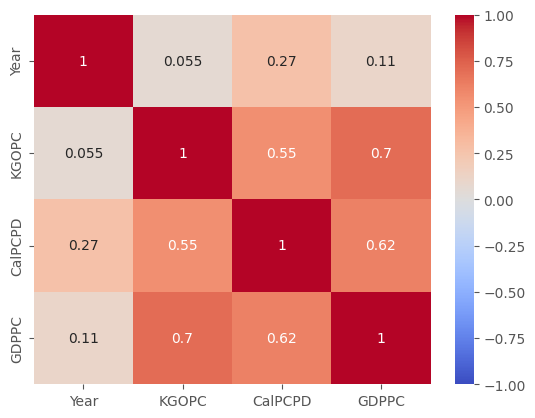

In [38]:
# getting a sence of the correlation between different Parameters
sns.heatmap(
    data.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    center=0
)

<Axes: xlabel='KGOPC', ylabel='GDPPC'>

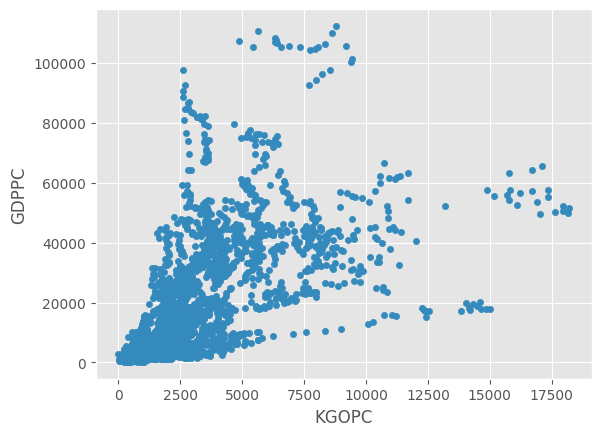

In [39]:
data.plot.scatter(x='KGOPC',y='GDPPC')

I noticed the heteroscedasticity of the KGOPC with GDPPC and also with CalPCPD, so I did a log-log transformation for the KGOPC with GDPPC and semi-log for the CalPCPD with GDPPC, of course depending on the scatter plot of the variables before the transformation.

**Now I want to see the correlation between the logs of the data.**

In [40]:
data['Log_KGOPC']=np.log10(data['KGOPC'])
data['Log_GDPPC']=np.log10(data['GDPPC'])
data['Log_CalPCPD']=np.log10(data['CalPCPD'])


C:\Users\Mohamed\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


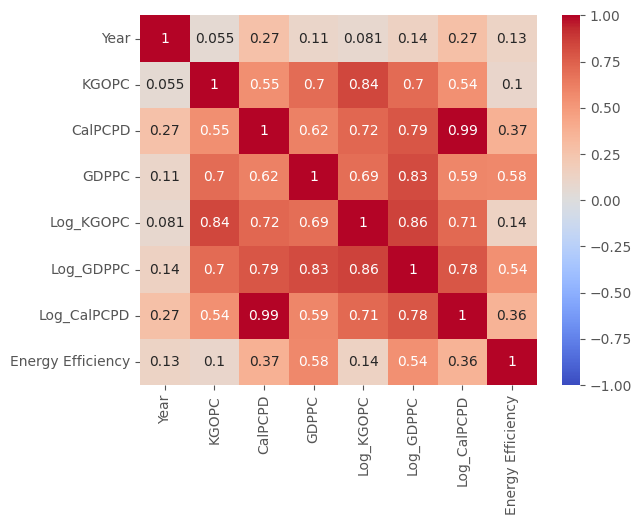

In [125]:
# the correlation heatmap
# getting a sence of the correlation between different Parameters
sns.heatmap(
    data.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    center=0
)
plt.savefig("heatmap.png", dpi=400 ,bbox_inches='tight')

In [42]:
import matplotlib.patches as patches

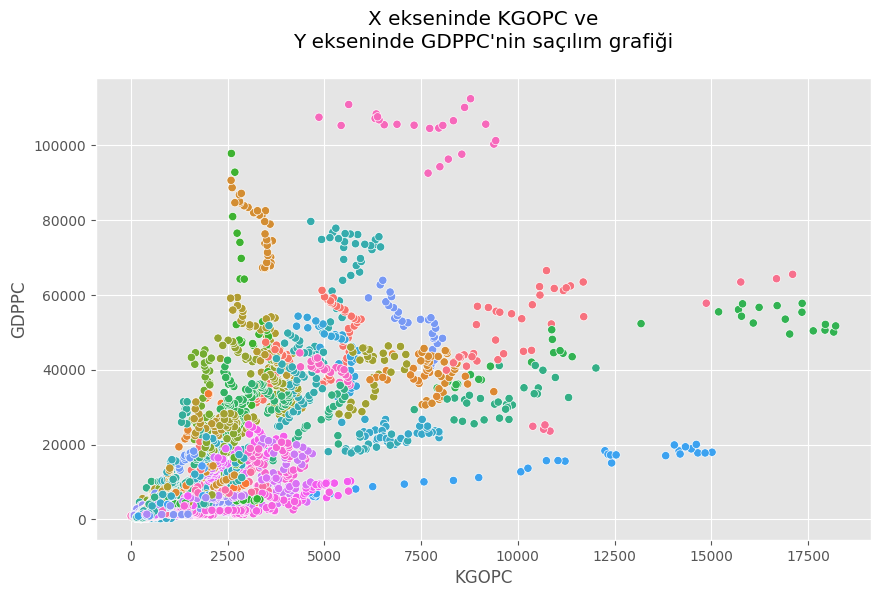

In [124]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data, 
    x='KGOPC', 
    y='GDPPC', 
    hue='Country Name', 
    legend=False  
)
plt.title("X ekseninde KGOPC ve\nY ekseninde GDPPC'nin saçılım grafiği\n")
plt.savefig("X ekseninde KGOPC ve ekseninde GDPPC'nin saçılım grafiği.png", dpi=400 ,bbox_inches='tight')

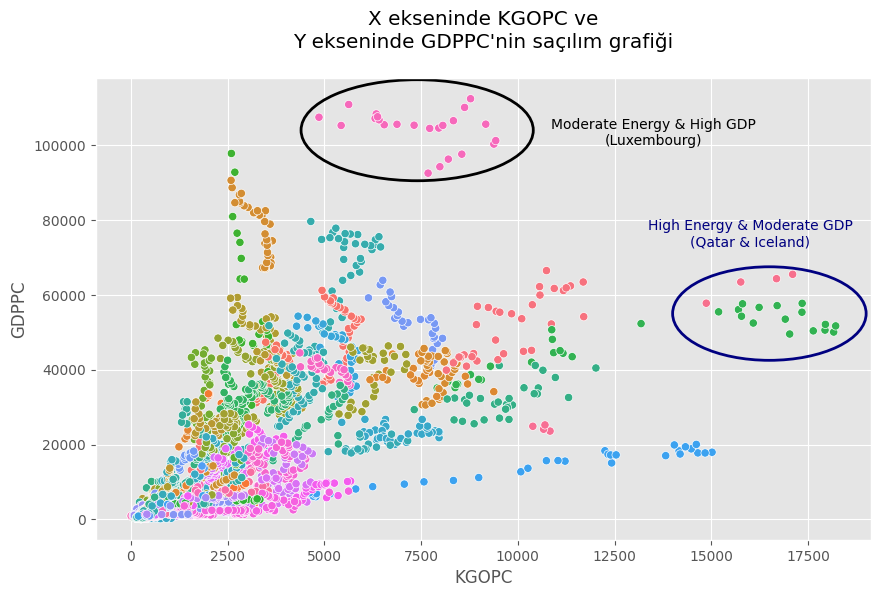

<Figure size 640x480 with 0 Axes>

In [128]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data, 
    x='KGOPC', 
    y='GDPPC', 
    hue='Country Name', 
    legend=False
)
ellipse1 = patches.Ellipse(
    xy=(16500, 55000),
    width= 5000,
    height= 25000,
    linewidth=2, 
    edgecolor='navy',   
    facecolor='none'  
)
ellipse2 = patches.Ellipse(
    xy=(7400, 104000),
    width= 6000,
    height= 27000,
    linewidth=2, 
    edgecolor='black',   
    facecolor='none'    
)
ax.add_patch(ellipse1)
ax.add_patch(ellipse2)
plt.text(13500,100000, "Moderate Energy & High GDP\n(Luxembourg)", color='black', ha='center')
plt.text(16000, 73000, "High Energy & Moderate GDP\n(Qatar & Iceland)", color='navy', ha='center')
plt.title("X ekseninde KGOPC ve\nY ekseninde GDPPC'nin saçılım grafiği\n")
plt.show()
plt.savefig("clusters.png", dpi=400 ,bbox_inches='tight')

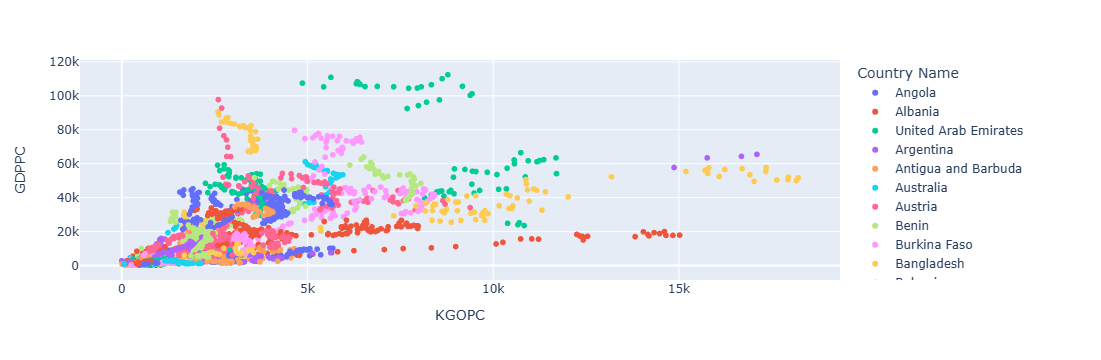

In [45]:
pltly.scatter(data,x='KGOPC', y='GDPPC', color='Country Name')

<Axes: xlabel='KGOPC', ylabel='GDPPC'>

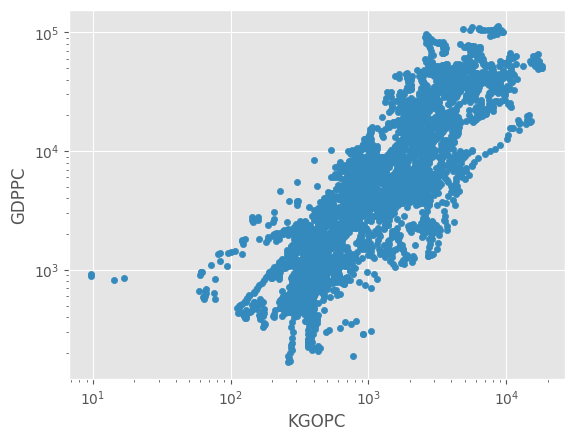

In [46]:
data.plot.scatter(x='KGOPC',y='GDPPC',logx=True,logy=True)

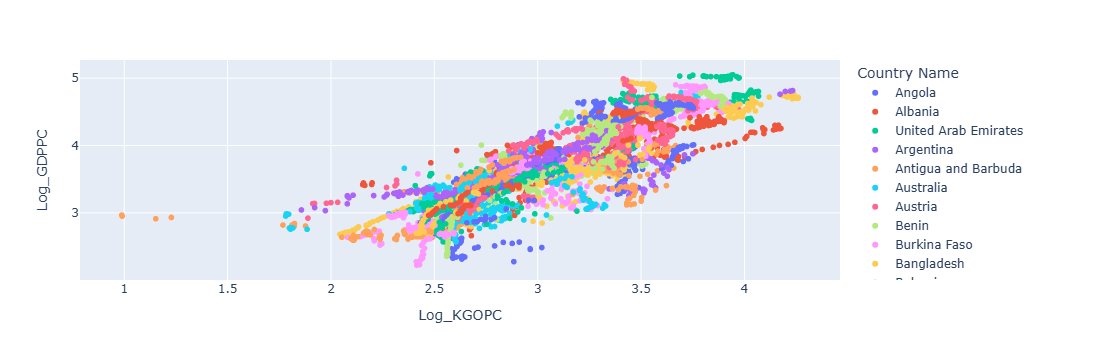

In [47]:
pltly.scatter(data,x='Log_KGOPC', y='Log_GDPPC', color='Country Name')

<Axes: xlabel='CalPCPD', ylabel='GDPPC'>

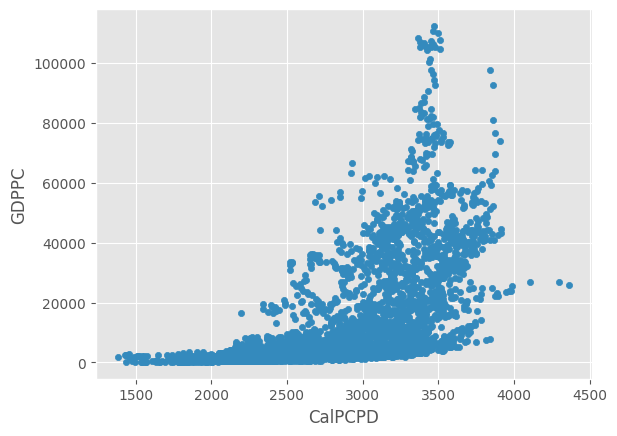

In [48]:
data.plot.scatter(x='CalPCPD',y='GDPPC')

<Axes: xlabel='CalPCPD', ylabel='GDPPC'>

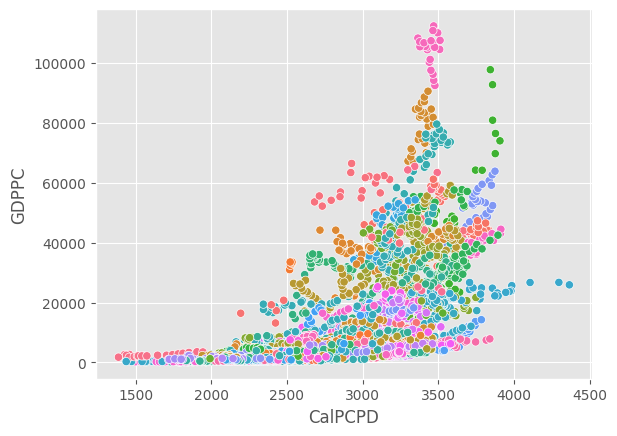

In [55]:
sns.scatterplot(data,x='CalPCPD', y='GDPPC', hue='Country Name',legend=False)

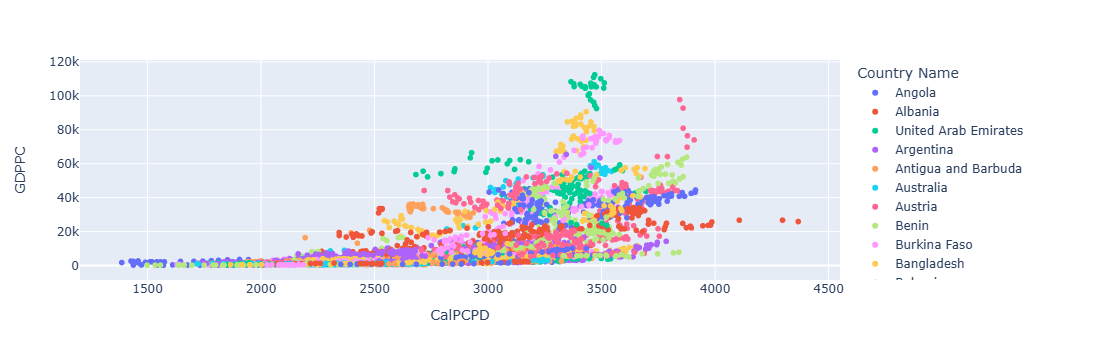

In [50]:
pltly.scatter(data,x='CalPCPD', y='GDPPC', color='Country Name')

<Axes: xlabel='CalPCPD', ylabel='GDPPC'>

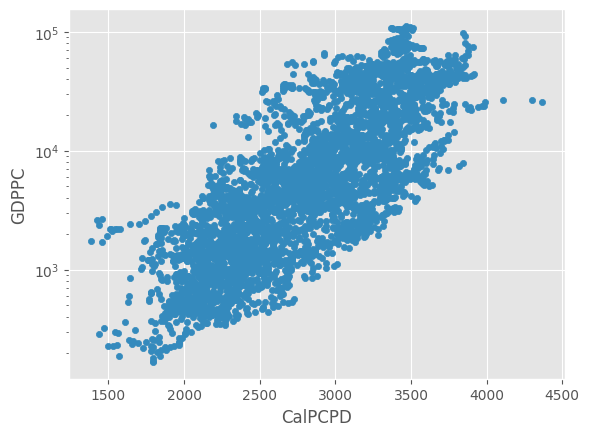

In [51]:
data.plot.scatter(x='CalPCPD',y='GDPPC',logy=True)

<Axes: xlabel='CalPCPD', ylabel='GDPPC'>

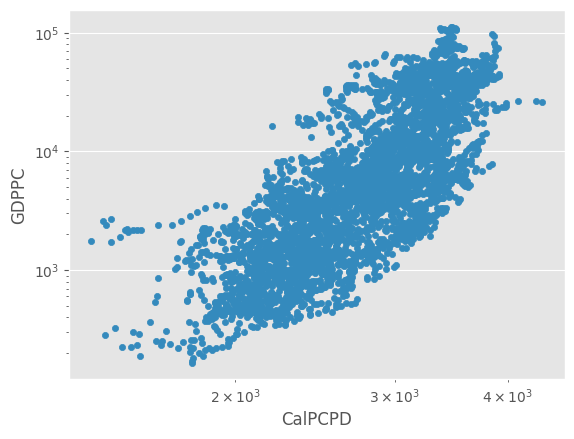

In [52]:
data.plot.scatter(x='CalPCPD',y='GDPPC',logx=True,logy=True)

In [53]:
data

Country Name Country Code  Year         KGOPC    CalPCPD  \
4214                Angola          AGO  1990    506.098907  1458.5900   
4215               Albania          ALB  1990    813.373801  2700.4243   
4216  United Arab Emirates          ARE  1990  10740.842922  2927.5122   
4217             Argentina          ARG  1990   1351.482776  2899.3665   
4218   Antigua and Barbuda          ATG  1990   1567.048996  2424.4932   
...                    ...          ...   ...           ...        ...   
9903         Venezuela, RB          VEN  2022   1478.064343  2325.3567   
9904              Viet Nam          VNM  2022   1023.057136  3026.1506   
9908          South Africa          ZAF  2022   1938.306447  2651.0393   
9909                Zambia          ZMB  2022    800.674874  2143.6448   
9910              Zimbabwe          ZWE  2022    416.586875  2072.4438   

             GDPPC  Log_KGOPC  Log_GDPPC  Log_CalPCPD  
4214   2675.052394   2.704235   3.427332     3.163933  
4215   1682.881087   2.910290   3.226053     3.431432  
4216  66481.613764   4.031038   4.822702     3.466499  
4217   8115.093864   3.130811   3.909294     3.462303  
4218  13166.524117   3.195083   4.119471     3.384621  
...            ...        ...        ...          ...  
9903   1379.977788   3.169693   3.139872     3.366490  
9904   3617.663115   3.009900   3.558428     3.480891  
9908   5786.865053   3.287422   3.762443     3.423416  
9909   1298.848050   2.903456   3.113558     3.331153  
9910   1369.197615   2.619706   3.136466     3.316483  

[4513 rows x 9 columns]

In [56]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
y=data['Log_GDPPC']
x=data['Log_KGOPC']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_GDPPC   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                 1.263e+04
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:07:28   Log-Likelihood:                -1176.2
No. Observations:                4512   AIC:                             2356.
Df Residuals:                    4510   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2183      0.031      6.936      0.000       0.157       0.280
Log_KGOPC      1.1323      0.010    112.380      0.000       1.113       1.152
==============================================================================
Omnibus:                       70.642   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.043
Skew:                          -0.211   Prob(JB):                     6.25e-21
Kurtosis:                       3.563   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
y=data['Log_GDPPC']
x=data['CalPCPD']
x=sm.add_constant(x)
model12=sm.OLS(y,x).fit()

In [59]:
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_GDPPC   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     7377.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:07:38   Log-Likelihood:                -2001.8
No. Observations:                4512   AIC:                             4008.
Df Residuals:                    4510   BIC:                             4020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0886      0.031     35.001      0.000       1.028       1.150
CalPCPD        0.0009   1.09e-05     85.890      0.000       0.001       0.001
==============================================================================
Omnibus:                       59.342   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.428
Skew:                           0.080   Prob(JB):                     4.52e-09
Kurtosis:                       2.577   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
y=data['Log_GDPPC']
x=data[['Log_KGOPC','Log_CalPCPD']]
x=sm.add_constant(x)
model2=sm.OLS(y,x).fit()

In [61]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_GDPPC   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     8737.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:07:38   Log-Likelihood:                -614.16
No. Observations:                4512   AIC:                             1234.
Df Residuals:                    4509   BIC:                             1254.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.5401      0.219    -34.432      0.000      -7.969      -7.111
Log_KGOPC       0.8084      0.013     63.629      0.000       0.783       0.833
Log_CalPCPD     2.5464      0.071     35.717      0.000       2.407       2.686
==============================================================================
Omnibus:                        0.071   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.965   Jarque-Bera (JB):                0.051
Skew:                          -0.006   Prob(JB):                        0.975
Kurtosis:                       3.011   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
test=data[data['Year']==1996]

In [63]:
y=test['Log_GDPPC']
x=test[['Log_KGOPC','Log_CalPCPD']]
x=sm.add_constant(x)
model3=sm.OLS(y,x).fit()

In [64]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_GDPPC   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     229.9
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           6.17e-43
Time:                        16:07:38   Log-Likelihood:                -24.107
No. Observations:                 130   AIC:                             54.21
Df Residuals:                     127   BIC:                             62.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.0364      1.306     -6.152      0.000     -10.622      -5.451
Log_KGOPC       0.7642      0.085      8.974      0.000       0.596       0.933
Log_CalPCPD     2.7211      0.436      6.235      0.000       1.858       3.585
==============================================================================
Omnibus:                        1.909   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.584
Skew:                          -0.266   Prob(JB):                        0.453
Kurtosis:                       3.092   Cond. No.                         251.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
y=data['Log_GDPPC']
x=data[['Log_KGOPC','CalPCPD']]
x=sm.add_constant(x)
model4=sm.OLS(y,x).fit()

In [66]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_GDPPC   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     8853.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:07:38   Log-Likelihood:                -590.47
No. Observations:                4512   AIC:                             1187.
Df Residuals:                    4509   BIC:                             1206.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.028      2.699      0.007       0.021       0.130
Log_KGOPC      0.7974      0.013     62.608      0.000       0.772       0.822
CalPCPD        0.0004   1.15e-05     36.562      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.949   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.994
Skew:                          -0.028   Prob(JB):                        0.608
Kurtosis:                       2.952   Cond. No.                     2.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
y=data['Log_GDPPC']
x=data[['Log_KGOPC','Year','CalPCPD']]
x=sm.add_constant(x)
model5=sm.OLS(y,x).fit()

In [68]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_GDPPC   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     5901.
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:07:39   Log-Likelihood:                -590.46
No. Observations:                4512   AIC:                             1189.
Df Residuals:                    4508   BIC:                             1215.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.922      0.000      1.000      -1.808       1.808
Log_KGOPC      0.7976      0.013     61.765      0.000       0.772       0.823
Year        3.749e-05      0.000      0.081      0.935      -0.001       0.001
CalPCPD        0.0004    1.2e-05     34.856      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.958   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                1.004
Skew:                          -0.027   Prob(JB):                        0.605
Kurtosis:                       2.951   Cond. No.                     7.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Now, I have noticed that there are some outliers in the data in the first scatter plot**

but first we have to define exterem, as we see ther are very few data points that has KGOPC > 13k

In [69]:
data[data['KGOPC']>13000]['Country Name'].unique()

array(['Iceland', 'Trinidad and Tobago', 'Qatar'], dtype=object)

In [101]:
A=0.1677
slope=1.1408
xline=np.linspace(data['KGOPC'].min(),data['KGOPC'].max())
yline= (10**A)*(xline**slope)

Those are the countries, but also those countries are way under the fitting line of the data.

<Axes: xlabel='KGOPC', ylabel='GDPPC'>

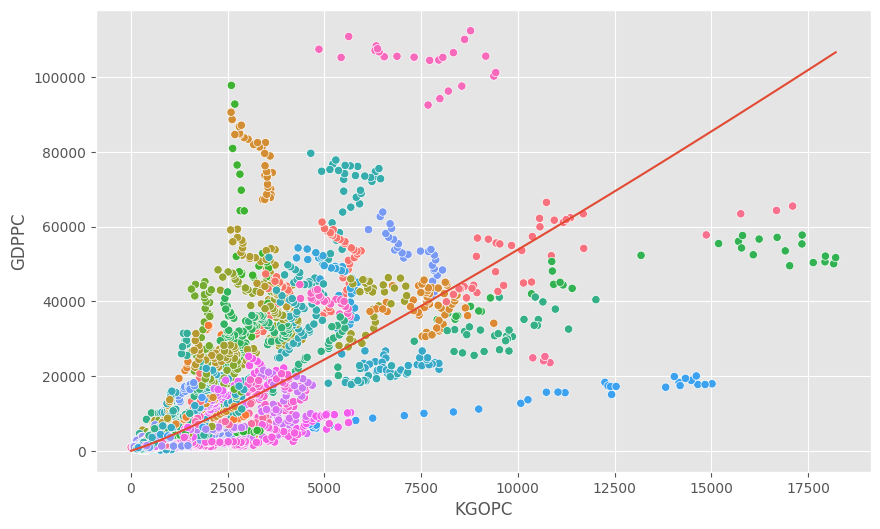

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data,x='KGOPC', y='GDPPC',hue='Country Name', legend=False)
sns.lineplot(x=xline,y=yline)

so to know the extreme energy unsing countries, i would take to be the top 5% countries i.e 2 sigma above the average, but first lets take a look at the ditribution of the KGOPC

<Axes: xlabel='KGOPC', ylabel='Count'>

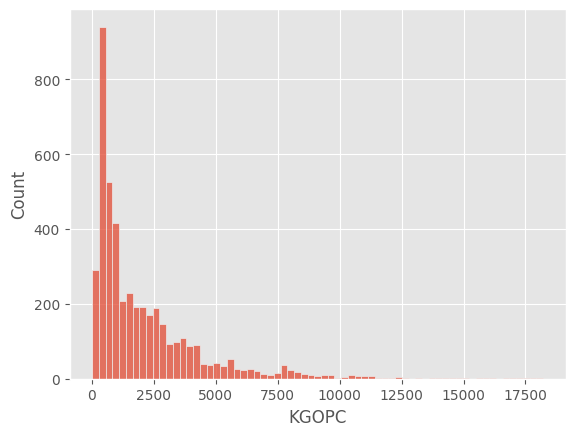

In [72]:
sns.histplot(data, x='KGOPC')

the data is not normally distributed so to find the top 5% we can normalize the data and then find the top 5% or we can use the quantile function.
in fact i wiil even make it very strict and take the top 1%.

In [73]:
data['KGOPC'].quantile(0.99)

11160.038530957914

the top 1% KGOPC countries have a KGOPC > 11160

In [74]:
data[data['KGOPC']>11160]['Country Name'].unique()

array(['United Arab Emirates', 'Iceland', 'Kuwait', 'Trinidad and Tobago',
       'Qatar'], dtype=object)

but this raised a question, in the KGOPC vs GDPPC scatter plot we can find some points that has way greater GDPPC for way lower KGOPC, so I will introduce a paramater to find the effeciency of the energy usage.

In [75]:
data['Energy Efficiency']=data['GDPPC']/data['KGOPC']

<Axes: xlabel='Energy Efficiency', ylabel='Count'>

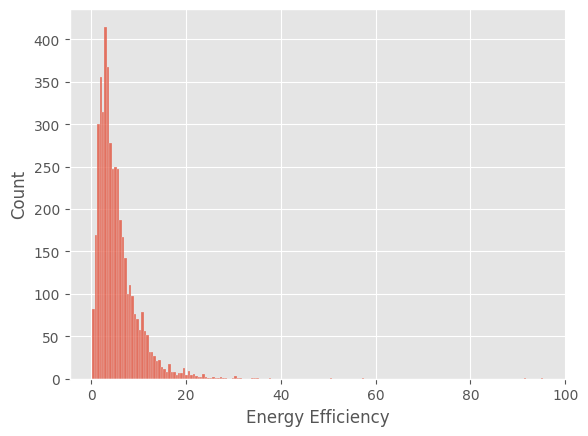

In [76]:
sns.histplot(data,x='Energy Efficiency')

In [77]:
data['Energy Efficiency'].quantile(0.95)

13.198085161037556

In [78]:
data[data['Energy Efficiency']>13.2]['Country Name'].unique()

array(['Bahamas, The', 'Barbados', 'Switzerland', 'Dominica', 'Kiribati',
       'St. Kitts and Nevis', 'St. Lucia', 'Maldives',
       'St. Vincent and the Grenadines', 'Vanuatu',
       'Hong Kong SAR, China', 'Uruguay', 'Denmark', 'Ireland', 'Lesotho',
       'Solomon Islands', 'Timor-Leste', 'Cabo Verde', 'United Kingdom',
       'Norway', 'Luxembourg', 'Cyprus', 'Israel', 'Panama', 'Malta',
       'Yemen, Rep.', 'Costa Rica', 'Austria', 'Germany', 'Italy',
       'Netherlands'], dtype=object)

now we have countries like: Yemen, Rep., Lesotho
these countries have a highe energy efficency becauce of other resons like for example lets investigate the Yemen case

In [79]:
data[(data['Energy Efficiency']>13.2)&(data['Country Name']=='Yemen, Rep.')]

Country Name Country Code  Year      KGOPC    CalPCPD        GDPPC  \
8801  Yemen, Rep.          YEM  2016  83.369533  1759.5204  1197.958660   
8980  Yemen, Rep.          YEM  2017  71.965030  1811.1893  1103.456348   

      Log_KGOPC  Log_GDPPC  Log_CalPCPD  Energy Efficiency  
8801   1.921007   3.078442     3.245394          14.369262  
8980   1.857122   3.042755     3.257964          15.333230

<Axes: xlabel='Year', ylabel='GDPPC'>

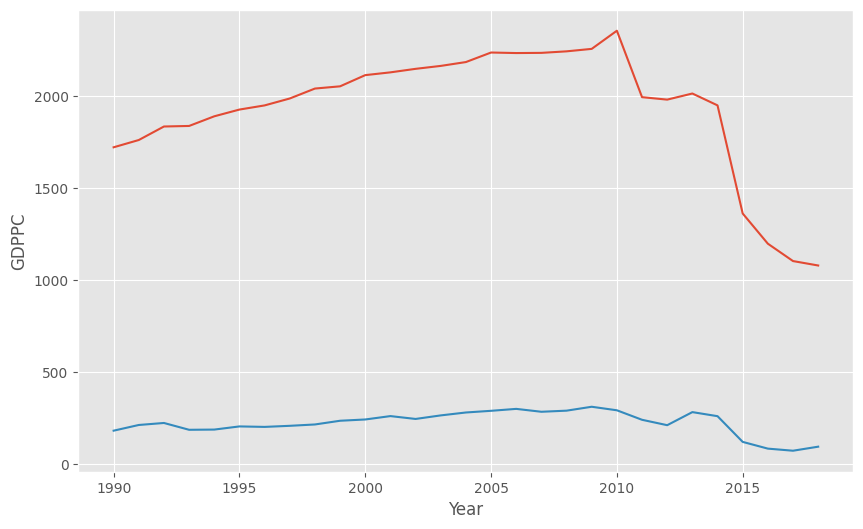

In [100]:
plt.figure(figsize=(10, 6))
sns.lineplot(data[data['Country Name']=='Yemen, Rep.'], x='Year', y='GDPPC')
sns.lineplot(data[data['Country Name']=='Yemen, Rep.'], x='Year', y='KGOPC')

this is why i introduced a new determinant to determin the energy efficient countries and that is the country should have a GDPPC top 5%

In [81]:
data['GDPPC'].mean()

12719.691122739434

In [82]:
data['GDPPC'].quantile(0.95)

48401.76176249674

In [83]:
# efficent countries in the worlid
data[(data['Energy Efficiency']>13.2)&(data['GDPPC']>48401.8)]['Country Name'].unique()

array(['Switzerland', 'Denmark', 'Ireland', 'Norway', 'Luxembourg',
       'United Kingdom', 'Netherlands'], dtype=object)

In [84]:
data.describe()

Year         KGOPC      CalPCPD          GDPPC    Log_KGOPC  \
count  4512.000000   4512.000000  4512.000000    4512.000000  4512.000000   
mean   2006.358378   2105.809603  2801.594978   12719.691123     3.089198   
std       9.367110   2397.722863   514.267243   17496.353759     0.464156   
min    1990.000000      9.727288  1386.576700     166.710440     0.987992   
25%    1998.000000    501.273582  2379.423850    1761.343938     2.700075   
50%    2006.000000   1188.144466  2810.913250    4771.179941     3.074869   
75%    2014.000000   2758.297115  3219.775550   16502.809664     3.440641   
max    2022.000000  18212.733645  4366.500000  112417.876989     4.260375   

         Log_GDPPC  Log_CalPCPD  Energy Efficiency  
count  4512.000000  4512.000000        4512.000000  
mean      3.716228     3.439745           5.509308  
std       0.612260     0.082711           4.659243  
min       2.221963     3.141944           0.246092  
25%       3.245844     3.376472           2.683238  
50%       3.678626     3.448847           4.334279  
75%       4.217558     3.507826           6.972505  
max       5.050835     3.640133          95.326534

In [85]:
gdp_pc[gdp_pc['Country Name']=='World']

Country Name Country Code  Year         GDPPC
259          World          WLD  1960   3663.601336
525          World          WLD  1961   3757.490556
791          World          WLD  1962   3888.291597
1057         World          WLD  1963   3997.506759
1323         World          WLD  1964   4172.995194
...            ...          ...   ...           ...
16219        World          WLD  2020  10541.811855
16485        World          WLD  2021  11124.749529
16751        World          WLD  2022  11403.941081
17017        World          WLD  2023  11631.716477
17283        World          WLD  2024  11851.505172

[65 rows x 4 columns]

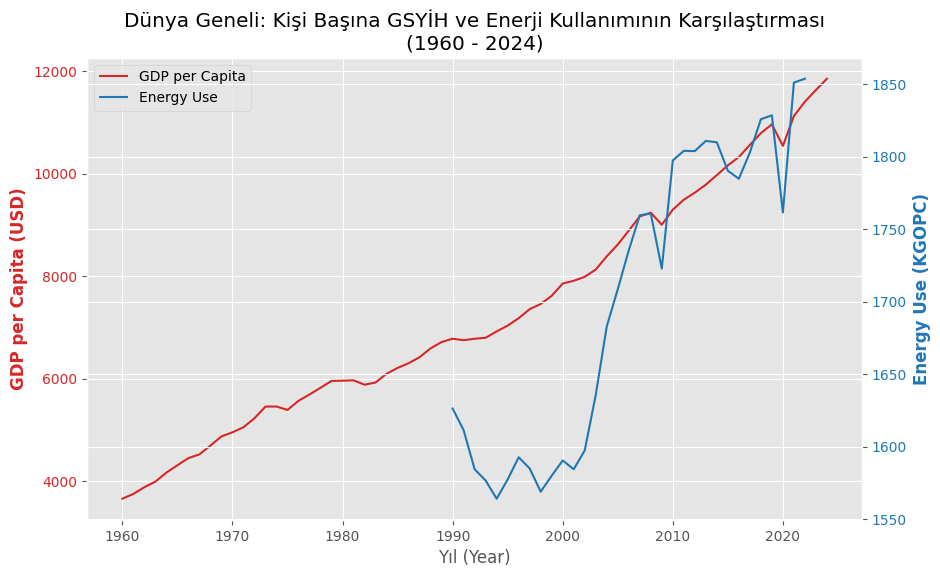

In [120]:

df_gdp_world = gdp_pc[gdp_pc['Country Name'] == 'World']
df_eng_world = eng_use[eng_use['Country Name'] == 'World']


fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:red'
ax1.set_xlabel('Yıl (Year)')
ax1.set_ylabel('GDP per Capita (USD)', color=color1, weight='bold')
line1 = ax1.plot(df_gdp_world['Year'], df_gdp_world['GDPPC'], color=color1, label='GDP per Capita')
ax1.tick_params(axis='y', labelcolor=color1)


ax2 = ax1.twinx()

color2 = 'tab:blue'
ax2.set_ylabel('Energy Use (KGOPC)', color=color2, weight='bold')
line2 = ax2.plot(df_eng_world['Year'], df_eng_world['KGOPC'], color=color2, label='Energy Use')
ax2.tick_params(axis='y', labelcolor=color2)


lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 5. Add Title
plt.title("Dünya Geneli: Kişi Başına GSYİH ve Enerji Kullanımının Karşılaştırması\n(1960 - 2024)")

plt.show()
fig.savefig("zaman seri.png", dpi=400 ,bbox_inches='tight')

In [103]:
plt.savefig("my_plot.png", dpi=400, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [104]:
plt.gcf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [113]:
A=0.1677
slope=1.1408
xline=np.linspace(data['Log_KGOPC'].min(),data['Log_KGOPC'].max())
yline=A+(slope*xline)

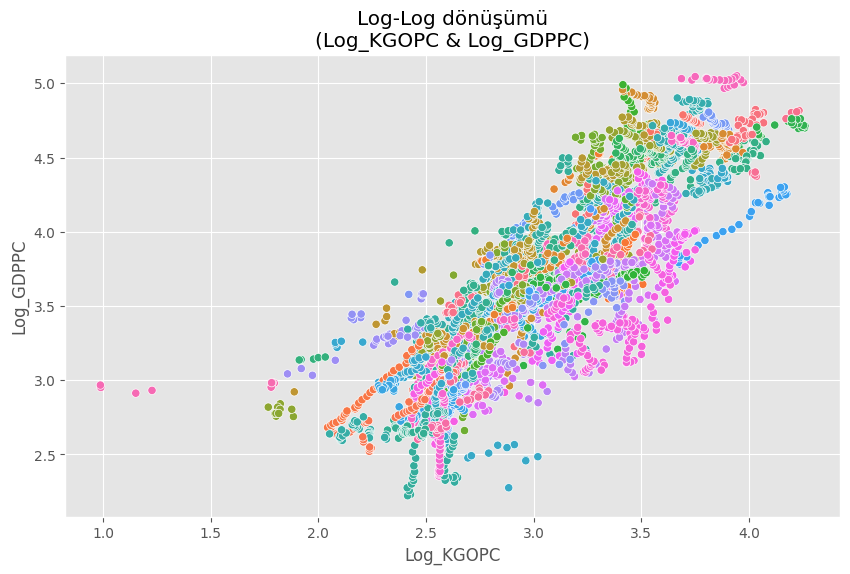

In [114]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data, x='Log_KGOPC',y='Log_GDPPC', hue='Country Name', legend=False)
plt.title("Log-Log dönüşümü\n(Log_KGOPC & Log_GDPPC)")
plt.savefig("Log-Log dönüşümü.png", dpi=400 ,bbox_inches='tight')

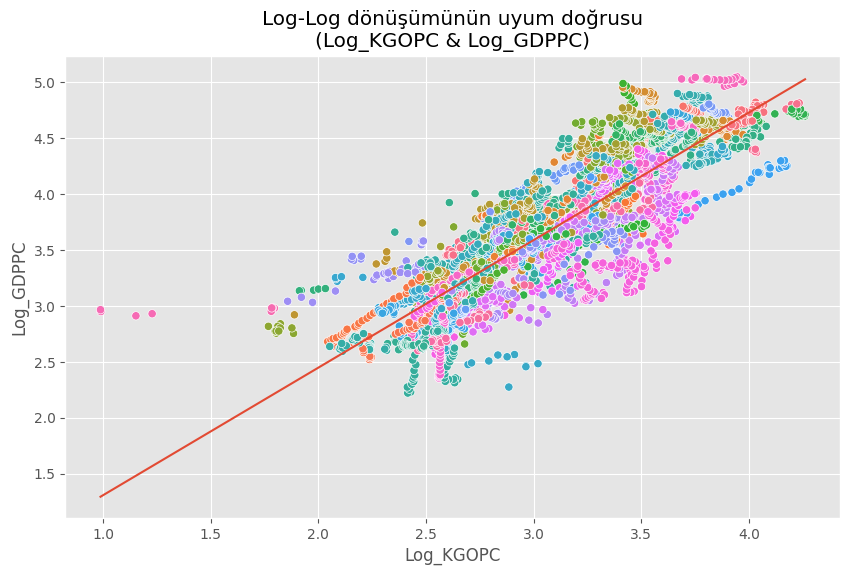

In [115]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data, x='Log_KGOPC',y='Log_GDPPC', hue='Country Name', legend=False)
sns.lineplot(x=xline,y=yline)
plt.title("Log-Log dönüşümünün uyum doğrusu\n(Log_KGOPC & Log_GDPPC)")
plt.savefig("Log-Log dönüşümü uyum doğrusu.png", dpi=400 ,bbox_inches='tight')

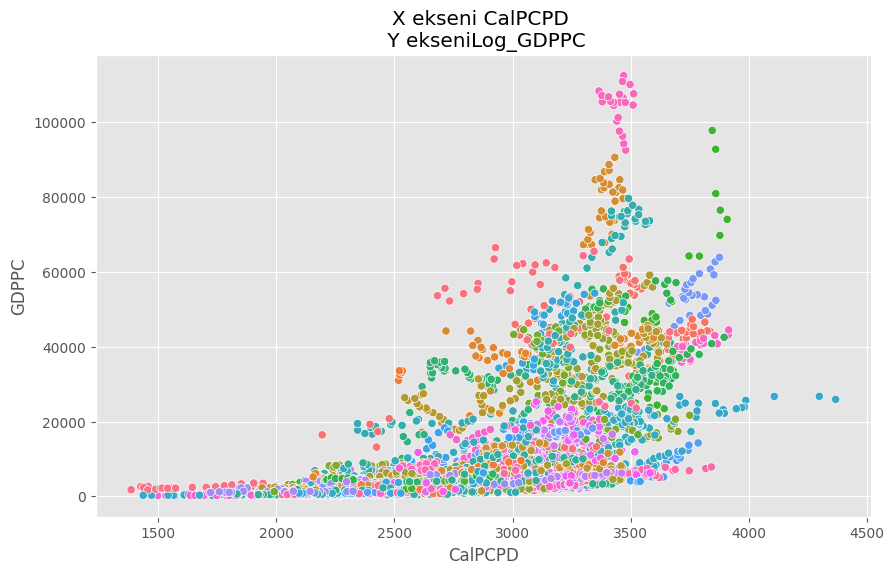

In [129]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data, x='CalPCPD',y='GDPPC', hue='Country Name', legend=False)
plt.title("X ekseni CalPCPD \n Y ekseniLog_GDPPC")
plt.savefig("X ekseni CalPCPD Y ekseniLog_GDPPC.png", dpi=400 ,bbox_inches='tight')

In [117]:
A=1.0886
slope=0.0009
xline=np.linspace(data['CalPCPD'].min(),data['CalPCPD'].max())
yline=A+(slope*xline)

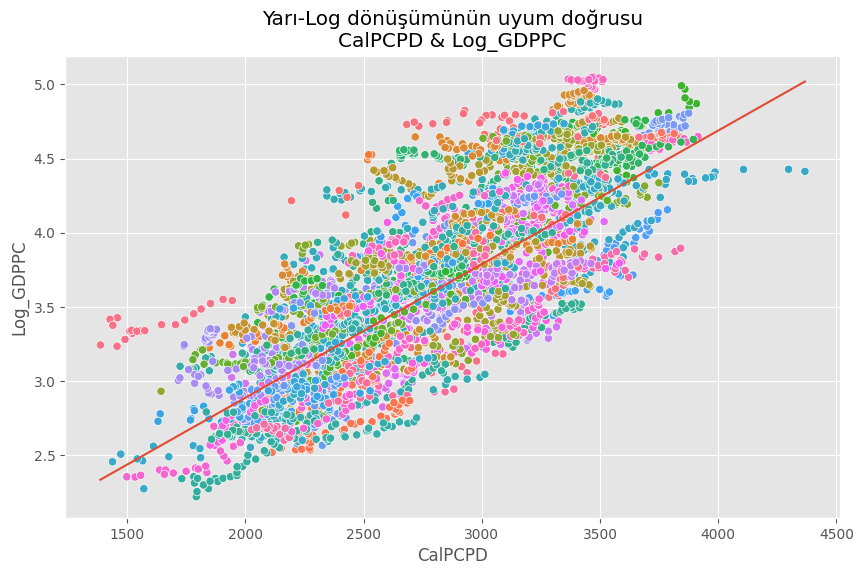

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data, x='CalPCPD',y='Log_GDPPC', hue='Country Name', legend=False)
sns.lineplot(x=xline,y=yline)
plt.title("Yarı-Log dönüşümünün uyum doğrusu\nCalPCPD & Log_GDPPC")
plt.savefig("yari-Log dönüşümü uyum doğrusu.png", dpi=400 ,bbox_inches='tight')